In [21]:
import numpy as np
import csv
import pylab 
import pandas
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as pyplot
import os, sys, warnings
import os.path as path
import plotly.plotly as py
import plotly.tools as tls
data = pandas.read_csv('/Users/ujwalkumar/Desktop/Independent Research/Code Work/10min.csv') #Importing the data set
data2 = pandas.read_csv('/Users/ujwalkumar/Desktop/Independent Research/Code Work/Alldaytest.csv') #Importing the data set

In [13]:
data.head()

,#id,wm_ra (deg),ra_err (arcsec),wm_decl (deg),wm_uncertainty_ns (arcsec),datapoints,newsource.id,sigma min,sigma max,flux mean,flux max,v_int,eta_int
0,1654,152.240,1.326,2.749,1.324009,59,,,,0.062,0.110,0.372,0.899
1,1655,149.601,0.833,3.406,0.831325,145,731,186.561,25.469,0.624,0.814,0.084,3.234
2,1656,152.442,10.094,1.969,10.087586,1,774,745.049,25.601,0.041,0.471,3.621,6.002
3,1657,149.603,0.993,2.447,0.991628,104,,,,0.131,0.278,0.244,1.315
4,1658,149.442,5.088,0.959,5.087642,4,,,,0.057,0.120,0.333,0.915


In [14]:
data2.head()

,#id,wm_ra (deg),ra_err (arcsec),wm_decl (deg),wm_uncertainty_ns (arcsec),datapoints,newsource.id,sigma min,sigma max,flux mean,flux max,v_int,eta_int
0,7006,151.036,1.916,3.633,1.911969,28,4881,14.787,0.256,0.114,0.203,1.176,0.344
1,7007,150.309,1.850,1.912,1.848898,30,,,,0.019,0.216,1.325,0.794
2,7008,151.039,1.709,0.992,1.708903,35,4926,28.506,0.830,0.038,0.337,0.895,1.722
3,7009,149.882,0.888,2.966,0.886442,130,,,,0.082,0.592,0.761,1.351
4,7010,151.252,1.075,1.610,1.074248,88,4877,15.867,0.275,0.039,0.137,0.680,0.742


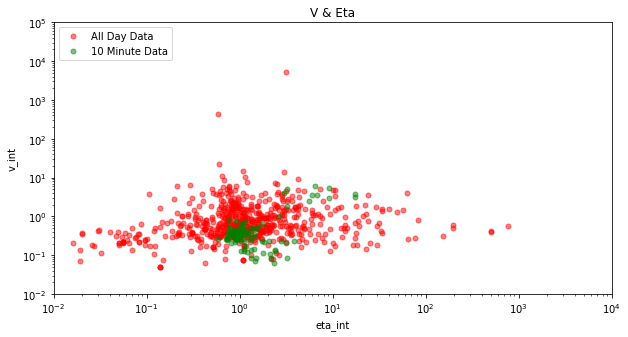

In [25]:
%matplotlib inline
pyplot.figure(figsize=(10,5))

procdir = '/Users/ujwalkumar/Desktop/Independent Research/Code Work/10min.csv'
procdir2 = '/Users/ujwalkumar/Desktop/Independent Research/Code Work/Alldaytest.csv'


#reading file 1, knowing where each part of the document is


with open(procdir, "r") as infile:
    read = csv.reader(infile)
    data = list(read)
#need to convert each list into an array
#make the list into a long column, not row --> (size,1)
size = len(data)
eta_int = np.ndarray(shape=(size,1),dtype=np.float64)
v_int = np.ndarray(shape=(size,1),dtype=np.float64)
flux_max = np.ndarray(shape=(size,1),dtype=np.float64)
flux_mean = np.ndarray(shape=(size,1))
#see where each variable is in the data. Creating an ith section//ek lekey, ek faeko
for i in range(1,size):
    eta_int[i-1,0] = float(data[i][12])
    v_int[i-1,0] = float(data[i][11])
    flux_max[i-1,0] = float(data[i][10])
    flux_mean[i-1,0] = float(data[i][9])
    
#reading file 2:

with open(procdir2, "r") as infile:
    read = csv.reader(infile)
    data = list(read)
#need to convert each list into an array
#make the list into a long column, not row --> (size,1)
size = len(data)
eta_int2 = np.ndarray(shape=(size,1),dtype=np.float64)
v_int2 = np.ndarray(shape=(size,1),dtype=np.float64)
flux_max2 = np.ndarray(shape=(size,1),dtype=np.float64)
flux_mean2 = np.ndarray(shape=(size,1))
#see where each variable is in the data. Creating an ith section//ek lekey, ek faeko
for i in range(1,size):
    eta_int2[i-1,0] = float(data[i][12])
    v_int2[i-1,0] = float(data[i][11])
    flux_max2[i-1,0] = float(data[i][10])
    flux_mean2[i-1,0] = float(data[i][9])

#Plotting the two together?

pyplot.plot(eta_int2,v_int2, 'go', markersize=5, alpha = 0.5, color = 'red', label = "All Day Data")
pyplot.plot(eta_int,v_int, 'go', markersize=5, alpha = 0.5, label = "10 Minute Data")
pylab.legend(loc='upper left')
pyplot.xscale('log')
pyplot.xlim([10e-3, 10e3])
pyplot.ylim([10e-3,100000])
pyplot.yscale('log')
pyplot.title('V & Eta')
pyplot.xlabel('eta_int')
pyplot.ylabel('v_int')
pyplot.show()

Text(0, 0.5, 'Frequency')

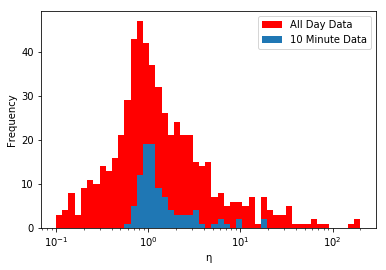

In [27]:
#plotting histograms of Eta for data
%matplotlib inline
pyplot.hist(eta_int2,bins=np.logspace(np.log10(0.1),np.log(10),50),log=True, color ='red', label = "All Day Data")
pyplot.hist(eta_int,bins=np.logspace(np.log10(0.1),np.log(10),50),log=True, label = "10 Minute Data") #plotting histograms of Eta for data2
pylab.legend(loc='upper right')
# pyplot.xlim([0.1,10])
pyplot.xscale('log')
pyplot.yscale('linear')
pyplot.xlabel('η')
pyplot.ylabel('Frequency')

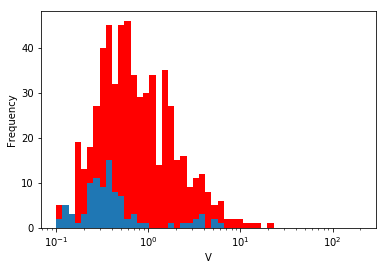

In [6]:
#Plotting histograms of V

%matplotlib inline

pyplot.hist(v_int2,bins=np.logspace(np.log10(0.1),np.log(10),50),log=True, color='red')
pyplot.hist(v_int,bins=np.logspace(np.log10(0.1),np.log(10),50), log = True)
#data2 plot
# pyplot.xlim([0.09,4])
pyplot.xscale('log')
pyplot.yscale('linear')
pyplot.xlabel('V')
pyplot.ylabel('Frequency')

#statistical test to compare two distributions to see if they're from the same parent distribution

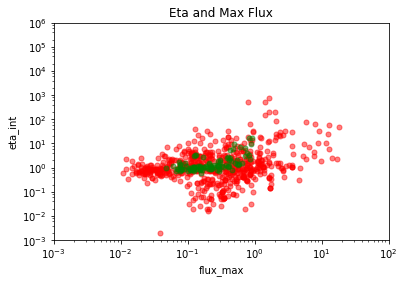

In [7]:
#plotting Eta and Max Flux


pyplot.plot(flux_max2,eta_int2, 'go', markersize=5, alpha = 0.5, color='red')
pyplot.plot(flux_max,eta_int, 'go', markersize=5, alpha = 0.5)
#for data2 plots
pyplot.xlim([10e-4, 10e1])
pyplot.ylim([10e-4,10e5])
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('Eta and Max Flux')
pyplot.xlabel('flux_max')
pyplot.ylabel('eta_int')

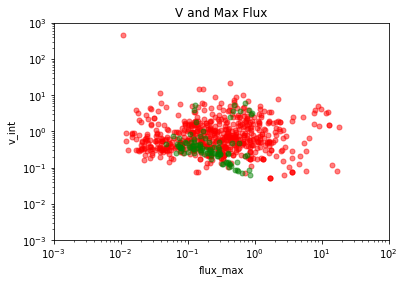

In [8]:
#plotting V and Max Flux
    

pyplot.plot(flux_max2,v_int2, 'go', markersize=5, alpha = 0.5, color='red')
pyplot.plot(flux_max,v_int, 'go', markersize=5, alpha = 0.5)
#data set 2 plots
pyplot.xlim([10e-4, 10e1])
pyplot.ylim([10e-4,10e2])
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('V and Max Flux')
pyplot.xlabel('flux_max')
pyplot.ylabel('v_int')

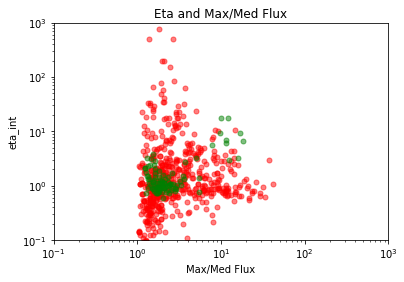

In [9]:
#plotting Eta and Max/Med Flux
with np.errstate(divide='ignore', invalid='ignore'):
    data_div=flux_max/flux_mean[:685]
with np.errstate(divide='ignore', invalid='ignore'):
    data_div2=flux_max2/flux_mean2[:685]
pyplot.ylim([10e-2, 10e2])
pyplot.xlim([10e-2,10e2])
pyplot.plot(data_div2,eta_int2, 'go', markersize=5, alpha = 0.5, color='red')
pyplot.plot(data_div,eta_int, 'go', markersize=5, alpha = 0.5)
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('Eta and Max/Med Flux')
pyplot.xlabel('Max/Med Flux')
pyplot.ylabel('eta_int')

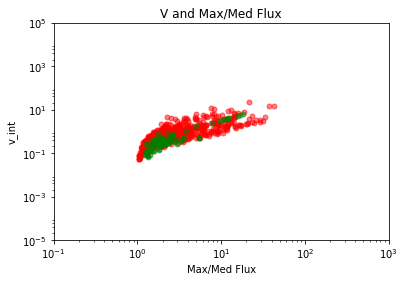

In [13]:
#plotting V and Max/Med Flux
with np.errstate(divide='ignore', invalid='ignore'):
    data_div=flux_max/flux_mean[:685]
with np.errstate(divide='ignore', invalid='ignore'):
    data_div2=flux_max2/flux_mean2[:685]
# creating a new column of data with the right size which is where the 99 comes into play
pyplot.ylim([10e-6, 10e4])
pyplot.xlim([10e-2,10e2])
pyplot.plot(data_div2,v_int2, 'go', markersize=5, alpha = 0.5, color ='red')
pyplot.plot(data_div,v_int, 'go', markersize=5, alpha = 0.5)
 # second set
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('V and Max/Med Flux')
pyplot.xlabel('Max/Med Flux')
pyplot.ylabel('v_int')